## NOTEBOOK 11

In this notebook we will introduce ourselves to machine learing, in particular to artificial neural networks (NN) using the python library Tensorflow.

We will start by doing regression on noisy set of data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import tensorflow as tf

from tensorflow.keras import layers, activations 

### EXERCISE 11.1 

In this first exercise we will try to make regression on a set of data generated from a simple linear function adding Gaussian noise on them. The generating function is

$$
f(x)=2x+1
$$

In [2]:
# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect


- **The dataset**

In [3]:
## Create training and validation set
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 100)
x_valid = np.random.uniform(-1, 1, 10)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma_t = 0.5 # noise standard deviation, for the moment it is absent
sigma_v =0.5
y_train = np.random.normal(m * x_train + b, sigma_t) 
y_valid = np.random.normal(m * x_valid + b, sigma_v)


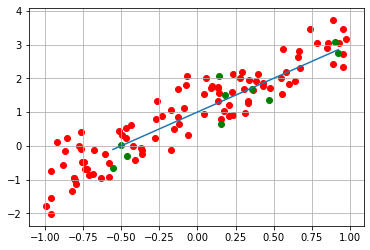

In [4]:
# plot training and target dataset
plt.plot(x_valid, y_target)
plt.scatter(x_train, y_train, color='r')
plt.scatter(x_valid,y_valid,color='g')
plt.grid(True); plt.show()

- **The Neural Network**

Now that we have a training and a test/validation set, we can create the neral network to solve the regression problem. In this case, a sigle node is sufficient.

In particular, a single node without any activation function (the activation here can be considered the identity) since the model from which we are learning is linear and the output of a single neuron $j$ is 

$$
out_{j}= \sum_{i} w_{i}x_{i} - \theta_{j}
$$

where $w_{i}$ are the weight assigned to each input of the neuron and $\theta_{j}$ is the bias, or threshold, of the neuron, so, as can be seen, again a linear function.

When the dataset will be more complicated, it will be useful to introduce a non-linear activation function like $\sigma$.

In [5]:
# Create a single node NN

model = tf.keras.Sequential() ##Sequential is for simple feed-forward NN
model.add(layers.Dense(1, input_shape=(1,))) ## Dense is for a fully connected layer

                                            ## no activation function

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [6]:
# get a summary of our composed model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


- **Training the network**

In [7]:
# fit the model using training dataset
# over 100 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=100,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          verbose=False, # tonot show all the training output
            validation_data=(x_valid, y_valid))
print("Network trained!")

Network trained!


- **Evaluation of the model**

In [8]:
# return weights
model.get_weights()

[array([[2.0352306]], dtype=float32), array([1.0557716], dtype=float32)]

In [9]:
# evaluate model with the exact curve
print("Evaluate accuracy of the network \n")
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Evaluate accuracy of the network 

1/1 [==============================] - 0s 1ms/step - loss: 0.0041 - mse: 0.0041

Test loss: 0.004103614017367363
Test accuracy: 0.004103614017367363


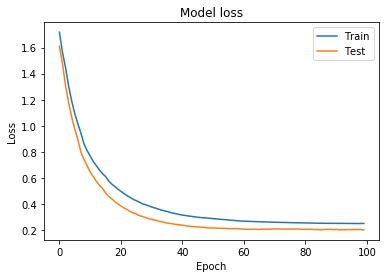

In [10]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

In this case the model **can't** overfit: the only two parameters it can learn are the angular coefficient and the intercept of the straight line, so the best it does is creating a linear function, it will not "fit the noise".

So, as expected, the error decreases and then stabilizes at a fixed value. The final value of the error will depend on the strenght of the noise (without the noise it is expected to be 0).

If the strenght of the noise for the validation set is lower than the training set the final value of the test error will be smaller than the training error.

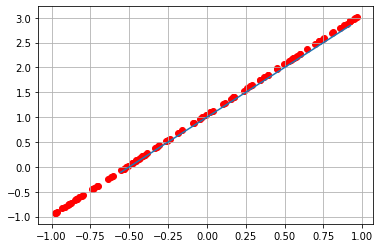

In [11]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

### EXERCISE 11.2

Let's consider a less trivial example: regression on data generated from an higher-order polynomial function:
$$
f(x)=4-3x-2x^2+3x^3
$$
for $x \in [-1,1]$.

In [12]:
## Parameters to be learnt

a0=4
a1=-3
a2=-2
a3=3

- **Generate the dataset**

In [13]:
np.random.seed(0) ## the seed is re initialized in order to not have to run all the notebook everytime 
x_train = np.random.uniform(-1, 1, 1000)
x_valid = np.random.uniform(-1, 1, 200)
x_valid.sort()
y_target = a0+a1 * x_valid + a2*x_valid**2+a3*x_valid**3 # ideal (target) linear function

sigma_t = 0.1 # noise standard deviation, for the moment it is absent
sigma_v =0.1
y_train = np.random.normal(a0+a1 * x_train + a2*x_train**2+a3*x_train**3, sigma_t) 
y_valid = np.random.normal(a0+a1 * x_valid + a2*x_valid**2+a3*x_valid**3, sigma_v)


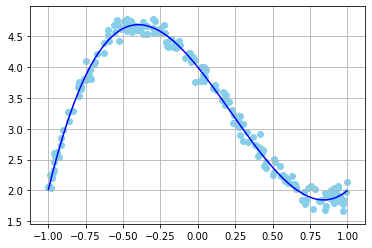

In [14]:
plt.plot(x_valid, y_target,color='b')
plt.scatter(x_valid, y_valid, color='skyblue')
plt.grid(True); plt.show()

- **The neural network**

Every NN with 3 or more layers is capable to represent any continuous function (although we could have an exponential scaling of the number of neuron in the hidden layer), therefore a single hidden layer will be necessary to fit our target

In [15]:
model3 = tf.keras.Sequential()
model3.add(layers.Dense(16, input_shape=(1,), activation=activations.sigmoid))
model3.add(layers.Dense(1))

# compile the model choosing optimizer, loss and metrics objects
model3.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [16]:
model3.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


- **Train the model**

In [17]:
history3 = model3.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=1000,
          shuffle=True, 
          verbose=False,
          validation_data=(x_valid, y_valid))
print("Training completed!")

Training completed!


- **Evaluation of the model**

In [18]:
#evaluate model with the exact curve
score = model3.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

7/7 [==============================] - 0s 6ms/step - loss: 0.0598 - mse: 0.0598

Test loss: 0.05979102477431297
Test accuracy: 0.05979102477431297


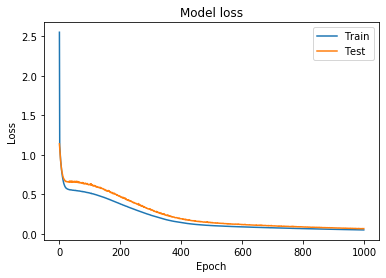

In [19]:
# look into training history
# Plot training & validation loss values
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

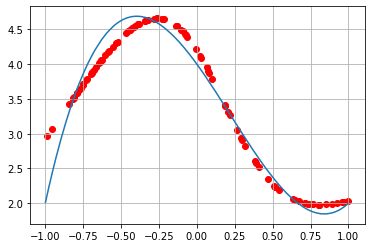

In [20]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model3.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

#### Considerations on single hidden layer NN

- with a single input and a single output, is useless to fit a polynomial function with a NN without activation function, since the function modeled will always be a straight line (due to the structure of the NN), so in this case I decided to incorporate a sigmoid activation function


- We can reach a *quite* good agreement, but it requires a long period of training. This can depend on several reasons: 1) too few neurons in the hidden layer, 2) inadequate activation function, 3) a single hidden layer can model the function, but is not the optimal solution, 4) unefficient optimizer

In the following we are going to explore ways to improve our results

In [21]:
models=[]

### Model with more neurons in the hidden layer

models.append(tf.keras.Sequential())

models[0].add(layers.Dense(50, input_shape=(1,), activation=activations.sigmoid))
models[0].add(layers.Dense(1))

models[0].compile(optimizer='sgd', loss='mse', metrics=['mse'])

### Model with different activation function
models.append(tf.keras.Sequential())

models[1].add(layers.Dense(16, input_shape=(1,), activation=activations.tanh))
models[1].add(layers.Dense(1))

models[1].compile(optimizer='sgd', loss='mse', metrics=['mse'])

## Deeper model (chosen in order to have a comparable numbers of parameters)

models.append(tf.keras.Sequential())

models[2].add(layers.Dense(5, input_shape=(1,), activation=activations.sigmoid))
models[2].add(layers.Dense(5,activation=activations.sigmoid))
models[2].add(layers.Dense(1))

models[2].compile(optimizer='sgd', loss='mse', metrics=['mse'])

## Different optimizer

models.append(tf.keras.Sequential())

models[3].add(layers.Dense(16, input_shape=(1,), activation=activations.sigmoid))
models[3].add(layers.Dense(1))

models[3].compile(optimizer='adam', loss='mse', metrics=['mse'])

In [22]:
for model in models:
    model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 50)                100       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 51        
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 17        
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_4"
________________

- **Train the models**

In [23]:
histories=[]
i=0

for model in models:
    print("Training model: ",i+1)
    histories.append(model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=100,
          shuffle=True,verbose=False,
          validation_data=(x_valid, y_valid)))
    print("Training successful!")
    i+=1

Training model:  1
Training successful!
Training model:  2
Training successful!
Training model:  3
Training successful!
Training model:  4
Training successful!


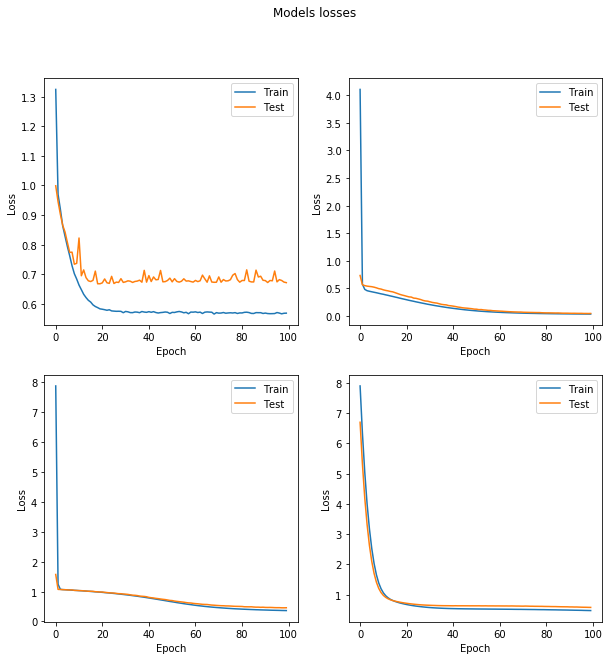

In [24]:
fig, axs=plt.subplots(2,2, figsize=(10,10))

count=0

for i in range(2):
    for j in range(2):
        axs[i][j].plot(histories[count].history['loss'])
        axs[i][j].plot(histories[count].history['val_loss'])
        axs[i][j].set_ylabel("Loss")
        axs[i][j].set_xlabel("Epoch")
        axs[i][j].legend(['Train', 'Test'], loc='best')
        count+=1


fig.suptitle('Models losses')

plt.show()

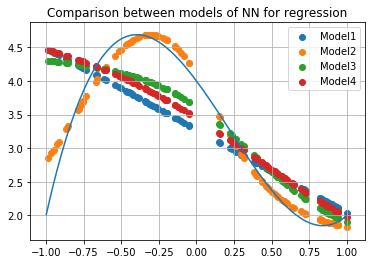

In [25]:
x_predicted = np.random.uniform(-1, 1, 100)
i=1

for model in models:
    y_predicted = model.predict(x_predicted)
    plt.scatter(x_predicted, y_predicted,label="Model"+str(i))
    i+=1

plt.plot(x_valid, y_target)
plt.title("Comparison between models of NN for regression")
plt.legend()
plt.grid(True)
plt.show()

We can see that, with only 100 epochs of training, the model that uses <code>tanh</code> as activation function has already modeled the main features of the generating curve, while the others are still struggling. Therefore will be a smart move to substitute sigmoid activation function with tanh.

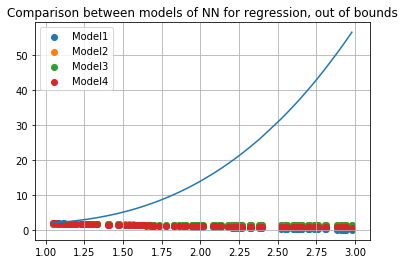

In [26]:
x_out= np.random.uniform(1, 3, 100)
x_out.sort()
y_out =a0+a1 * x_out + a2*x_out**2+a3*x_out**3
i=1

for model in models:
    y_predicted = model.predict(x_out)
    plt.scatter(x_out, y_predicted,label="Model"+str(i))
    i+=1

plt.plot(x_out, y_out)
plt.title("Comparison between models of NN for regression, out of bounds")
plt.legend()
plt.grid(True)
plt.show()

Although some models fit better the generating curve than the others, all of them performs bad outside the bounds in which they are trained. This is a big problem in regression with NNs.

In this last section of exercise 11.2 we are going to find an optimal configuration of the neural network to solve this kind of problem.

In [33]:
best_model=tf.keras.Sequential()
best_model.add(layers.Dense(6, input_shape=(1,), activation=activations.tanh))
best_model.add(layers.Dense(5,activation=activations.tanh))
best_model.add(layers.Dense(1))

# compile the model choosing optimizer, loss and metrics objects

opt = tf.keras.optimizers.Adam(learning_rate=0.01,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False)

best_model.compile(optimizer=opt, loss='mse', metrics=['mse'])

In [34]:
best_model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 6)                 12        
_________________________________________________________________
dense_16 (Dense)             (None, 5)                 35        
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 6         
Total params: 53
Trainable params: 53
Non-trainable params: 0
_________________________________________________________________


In [35]:
## Training the model
best_history = best_model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=100,
          shuffle=True,verbose=False,
          validation_data=(x_valid, y_valid))
print("Training successful!")

Training successful!


In [36]:
#evaluate model with the exact curve
b_score = best_model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', b_score[0])
print('Test accuracy:', b_score[1])

7/7 [==============================] - 0s 2ms/step - loss: 0.0024 - mse: 0.0024

Test loss: 0.002350857015699148
Test accuracy: 0.002350857015699148


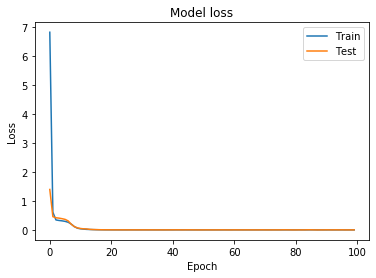

In [37]:
# Plot training & validation loss values
plt.plot(best_history.history['loss'])
plt.plot(best_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

As we can see, with <code> tanh </code> activation function the model learn pretty wuicly and then stabilizes to a fixed value of error, due to the fact we have added noise to the enerative model

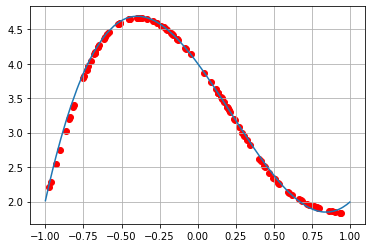

In [38]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = best_model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

So we have found a combination of optimizer, activation function, layers and number of hidden neurons that is really quick to train and is capable of reproduce features from the initial curve.

### EXERCISE 11.3

In this exercise we are going to generalize our model to fit a 2D function such as $f(x,y) = \sin(x^2+y^2)$ in the range $x \in [-3/2,3/2]$ and $y \in [-3/2,3/2]$.

The first thing to do is rephrase our previous best model to adapt to this case

- **Generate the dataset**

In [39]:
x_train=np.random.uniform(-3/2,3/2,1000)
y_train=np.random.uniform(-3/2,3/2,1000)

x_valid=np.random.uniform(-3/2,3/2,200)
y_valid=np.random.uniform(-3/2,3/2,200)


z_target=np.sin(x_valid**2+y_valid**2)

sigma_t=0.1
sigma_v=0.1
z_train=np.random.normal(np.sin(x_train**2+y_train**2), sigma_t) 
z_valid = np.random.normal(np.sin(x_valid**2+y_valid**2), sigma_v)

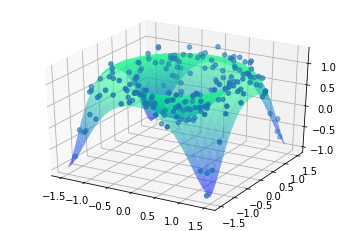

In [40]:
# Plotting
x = np.linspace(-3/2, 3/2, 30)
y = np.linspace(-3/2, 3/2, 30)

X, Y = np.meshgrid(x, y)
Z = np.sin(X**2+Y**2)


fig = plt.figure()
ax = plt.axes(projection="3d")
#ax.plot_wireframe(X, Y, Z)

ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='winter', edgecolor='none',alpha=0.5)
ax.scatter(x_valid, y_valid, z_valid, marker='o')



plt.show()

- **Creating the network**

In [46]:
f_model=tf.keras.Sequential()
f_model.add(layers.Dense(6, input_shape=(2,), activation=activations.tanh))
f_model.add(layers.Dense(5,activation=activations.tanh))
f_model.add(layers.Dense(1))

#compile the model choosing optimizer, loss and metrics objects

opt = tf.keras.optimizers.Adam(learning_rate=0.01,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False)

f_model.compile(optimizer=opt, loss='mse', metrics=['mse'])

In [42]:
f_model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 6)                 18        
_________________________________________________________________
dense_19 (Dense)             (None, 5)                 35        
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 6         
Total params: 59
Trainable params: 59
Non-trainable params: 0
_________________________________________________________________


- **Training the model**

In order to train the model, we have to prepare a set of data that the network is capable to read, therefore a single *data unit* will have to contain the $x$ and $y$ information.

In [43]:
xy_valid=np.array([
    [x_valid[i],y_valid[i]] for i in range(200)
])
xy_train=np.array([
    [x_train[i],y_train[i]] for i in range(1000)
])

In [47]:
## Training the model
f_history = f_model.fit(x=xy_train, y=z_train, 
          batch_size=32, epochs=200,
          shuffle=True,verbose=False,
          validation_data=(xy_valid, z_valid))
print("Training successful!")

Training successful!


In [48]:
#evaluate model with the exact curve
f_score = f_model.evaluate(xy_valid, z_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', f_score[0])
print('Test accuracy:', f_score[1])

7/7 [==============================] - 0s 2ms/step - loss: 0.0041 - mse: 0.0041

Test loss: 0.0041155703365802765
Test accuracy: 0.0041155703365802765


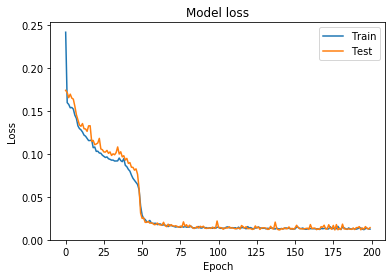

In [49]:
# Plot training & validation loss values
plt.plot(f_history.history['loss'])
plt.plot(f_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

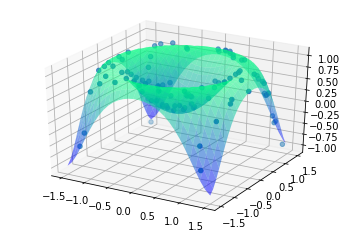

In [50]:
x_predicted = np.random.uniform(-1.5, 1.5, 100)
y_predicted = np.random.uniform(-1.5, 1.5, 100)
xy_predicted=np.array([[x_predicted[i],y_predicted[i]] for i in range(100)])

z_predicted = f_model.predict(xy_predicted)


fig = plt.figure()
ax = plt.axes(projection="3d")


ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='winter', edgecolor='none',alpha=0.5)
ax.scatter(x_predicted, y_predicted, z_predicted, marker='o')



plt.show()

In the end we can state that the model we produced for our regression problem on a simple polynomial function performs quite well also in this case, after reconfiguring the input layer from 1 to 2 neurons. 